In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../data/mm.csv")
df.head()

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714
1,2020,Q1,Manhattan,0.08,0.98,0.732857
2,2020,Q1,Chicago,0.14,0.99,0.788571
3,2020,Q1,Houston,0.33,0.99,0.835714
4,2020,Q1,Philadelphia,0.20,0.99,0.817143


In [6]:
df['occupancy_quarter_difference'] = df['ending_occupancy_proportion'] - df['starting_occupancy_proportion']
df

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion,occupancy_quarter_difference
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714,-0.79
1,2020,Q1,Manhattan,0.08,0.98,0.732857,-0.90
2,2020,Q1,Chicago,0.14,0.99,0.788571,-0.85
3,2020,Q1,Houston,0.33,0.99,0.835714,-0.66
4,2020,Q1,Philadelphia,0.20,0.99,0.817143,-0.79
...,...,...,...,...,...,...,...
185,2024,Q3,San Francisco,0.39,0.38,0.414615,0.01
186,2024,Q3,Los Angeles,0.47,0.42,0.461538,0.05
187,2024,Q3,Dallas/Ft Worth,0.60,0.54,0.574615,0.06
188,2024,Q3,South Bay/San Jose,0.42,0.34,0.398462,0.08


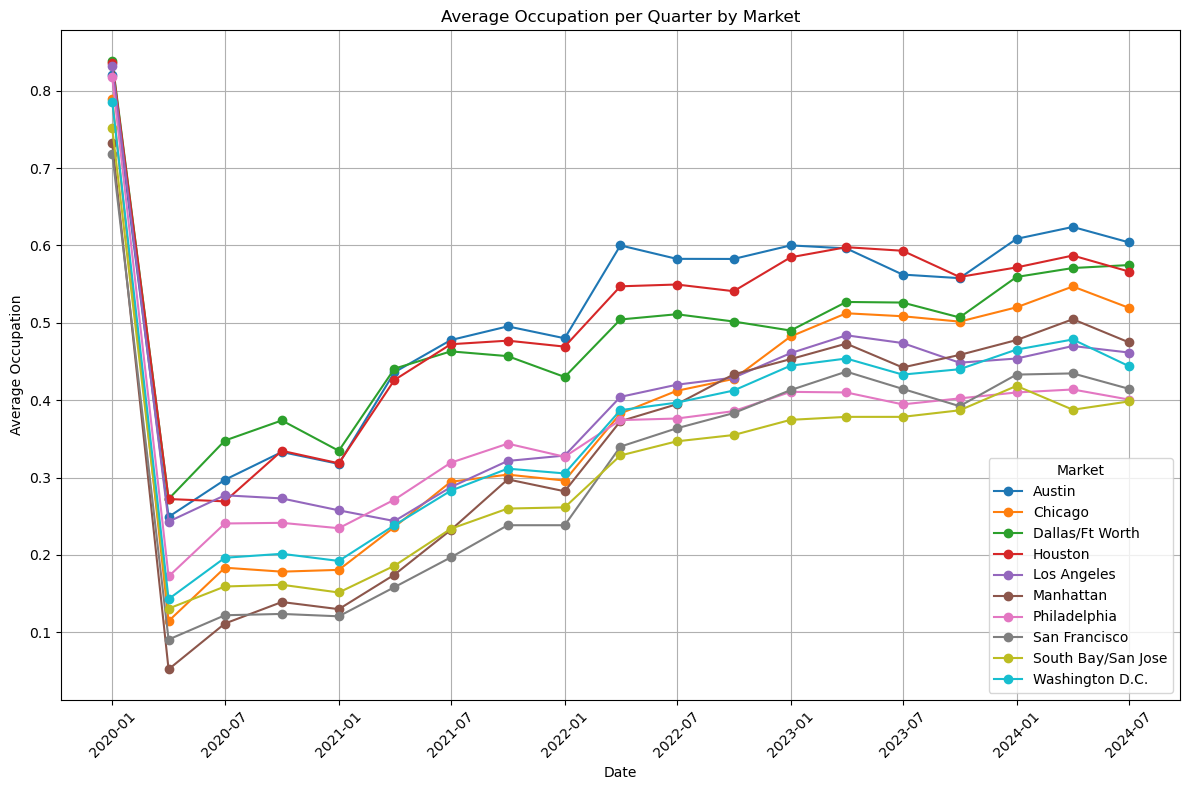

In [8]:
quarter_map = {
    'Q1': '-01-01',  # January 1st
    'Q2': '-04-01',  # April 1st
    'Q3': '-07-01',  # July 1st
    'Q4': '-10-01'   # October 1st
}
df['Date'] = df['year'].astype(str) + df['quarter'].map(quarter_map)
df['Date'] = pd.to_datetime(df['Date'])
df_overall_avg = df.groupby(['year', 'quarter', 'market']).agg({'avg_occupancy_proportion': 'mean'}).reset_index()
df_overall_avg['Date'] = df_overall_avg['year'].astype(str) + df_overall_avg['quarter'].map(quarter_map)
df_overall_avg['Date'] = pd.to_datetime(df_overall_avg['Date'])
df_overall_avg
plt.figure(figsize=(12, 8))
for market in df_overall_avg['market'].unique():
    market_data = df_overall_avg[df_overall_avg['market'] == market]
    plt.plot(market_data['Date'], market_data['avg_occupancy_proportion'], marker='o', linestyle='-', label=market)
    plt.xticks(rotation=45)
plt.title('Average Occupation per Quarter by Market')
plt.xlabel('Date')
plt.ylabel('Average Occupation')
plt.grid(True)
plt.legend(title='Market')


plt.tight_layout()
plt.show()

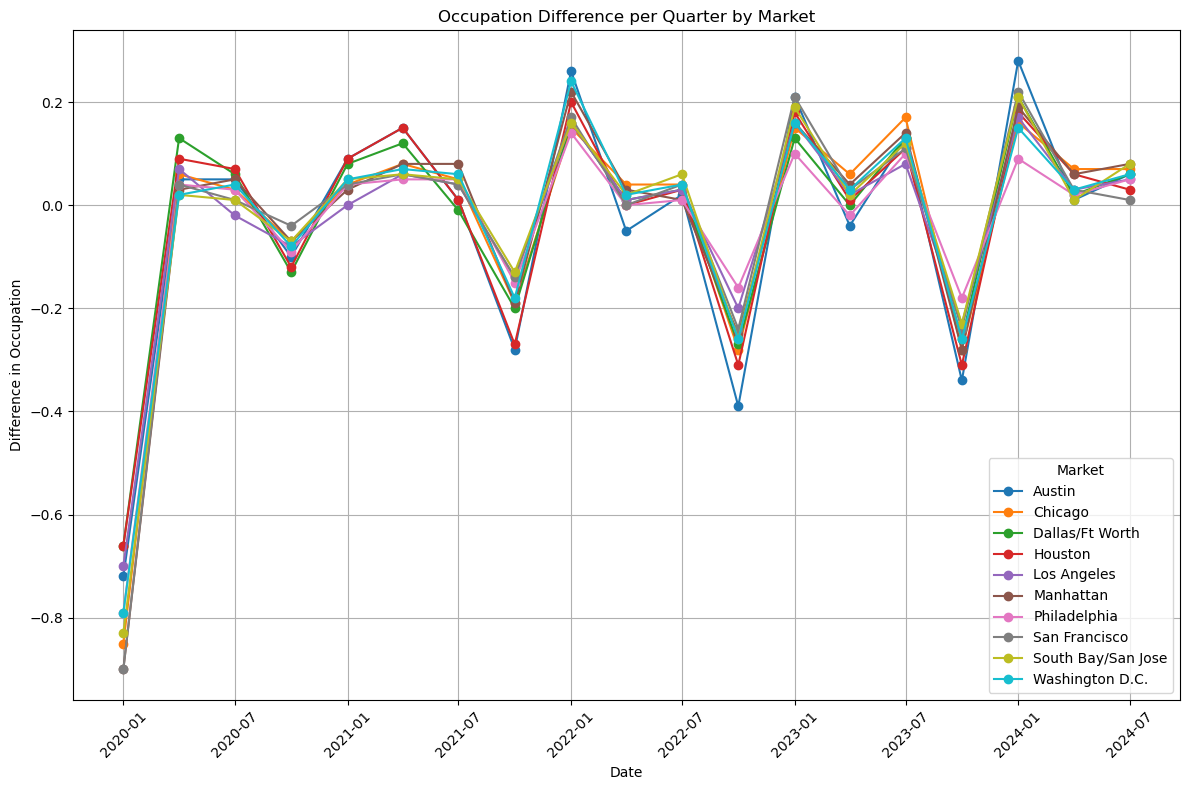

In [10]:
quarter_map = {
    'Q1': '-01-01',  # January 1st
    'Q2': '-04-01',  # April 1st
    'Q3': '-07-01',  # July 1st
    'Q4': '-10-01'   # October 1st
}
df['Date'] = df['year'].astype(str) + df['quarter'].map(quarter_map)
df['Date'] = pd.to_datetime(df['Date'])
df_overall_avg = df.groupby(['year', 'quarter', 'market']).agg({'occupancy_quarter_difference': 'mean'}).reset_index()
df_overall_avg['Date'] = df_overall_avg['year'].astype(str) + df_overall_avg['quarter'].map(quarter_map)
df_overall_avg['Date'] = pd.to_datetime(df_overall_avg['Date'])
df_overall_avg
plt.figure(figsize=(12, 8))
for market in df_overall_avg['market'].unique():
    market_data = df_overall_avg[df_overall_avg['market'] == market]
    plt.plot(market_data['Date'], market_data['occupancy_quarter_difference'], marker='o', linestyle='-', label=market)
    plt.xticks(rotation=45)
plt.title('Occupation Difference per Quarter by Market')
plt.xlabel('Date')
plt.ylabel('Difference in Occupation')
plt.grid(True)
plt.legend(title='Market')


plt.tight_layout()
plt.show()

In [11]:
count_df = df['market'].value_counts().reset_index()
count_df.columns = ['City', 'Count']
print(count_df)

                 City  Count
0     Washington D.C.     19
1           Manhattan     19
2             Chicago     19
3             Houston     19
4        Philadelphia     19
5       San Francisco     19
6         Los Angeles     19
7     Dallas/Ft Worth     19
8  South Bay/San Jose     19
9              Austin     19


In [14]:
df_q1 = df[df['quarter'] == 'Q1']
df_q2 = df[df['quarter'] == 'Q2']
df_q3 = df[df['quarter'] == 'Q3']
df_q4 = df[df['quarter'] == 'Q4']
df_q2.head()

,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion,occupancy_quarter_difference,Date
10,2020,Q2,Washington D.C.,0.17,0.15,0.143077,0.02,2020-04-01
11,2020,Q2,Manhattan,0.08,0.05,0.052308,0.03,2020-04-01
12,2020,Q2,Chicago,0.16,0.10,0.114615,0.06,2020-04-01
13,2020,Q2,Houston,0.32,0.23,0.272308,0.09,2020-04-01
14,2020,Q2,Philadelphia,0.21,0.17,0.172308,0.04,2020-04-01


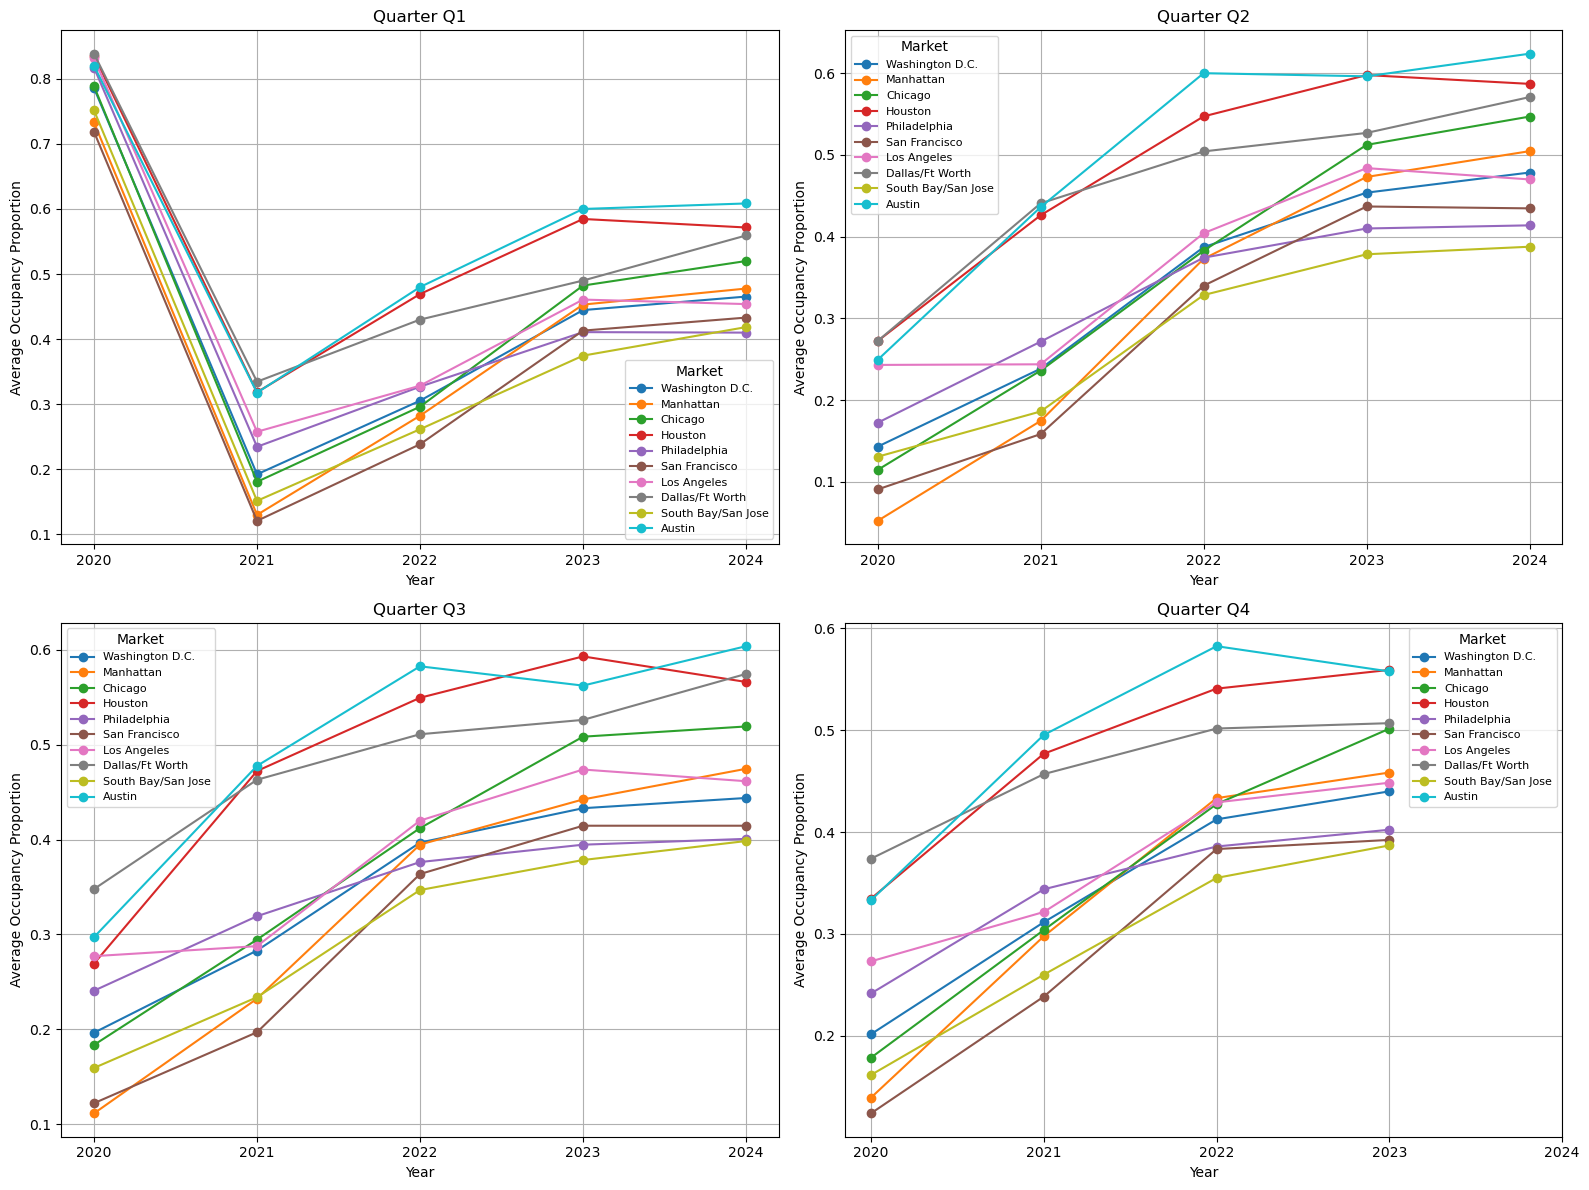

In [17]:
# List of all unique markets
markets = df['market'].unique()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
quarters = ['Q1', 'Q2', 'Q3', 'Q4']  # Assuming you want all four quarters

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each quarter and create a plot
for i, quarter in enumerate(quarters):
    ax = axes[i]
    
    # Filter data for the current quarter
    quarter_data = df[df['quarter'] == quarter]
    
    # Loop through each market and plot the data
    for market in markets:
        market_data = quarter_data[quarter_data['market'] == market]
        ax.plot(market_data['year'], market_data['avg_occupancy_proportion'], marker='o', label=market)
    
    ax.set_title(f'Quarter {quarter}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Occupancy Proportion')
    ax.set_xticks(df['year'].unique())  # Set x-ticks to be each unique year
    ax.legend(title='Market', fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()

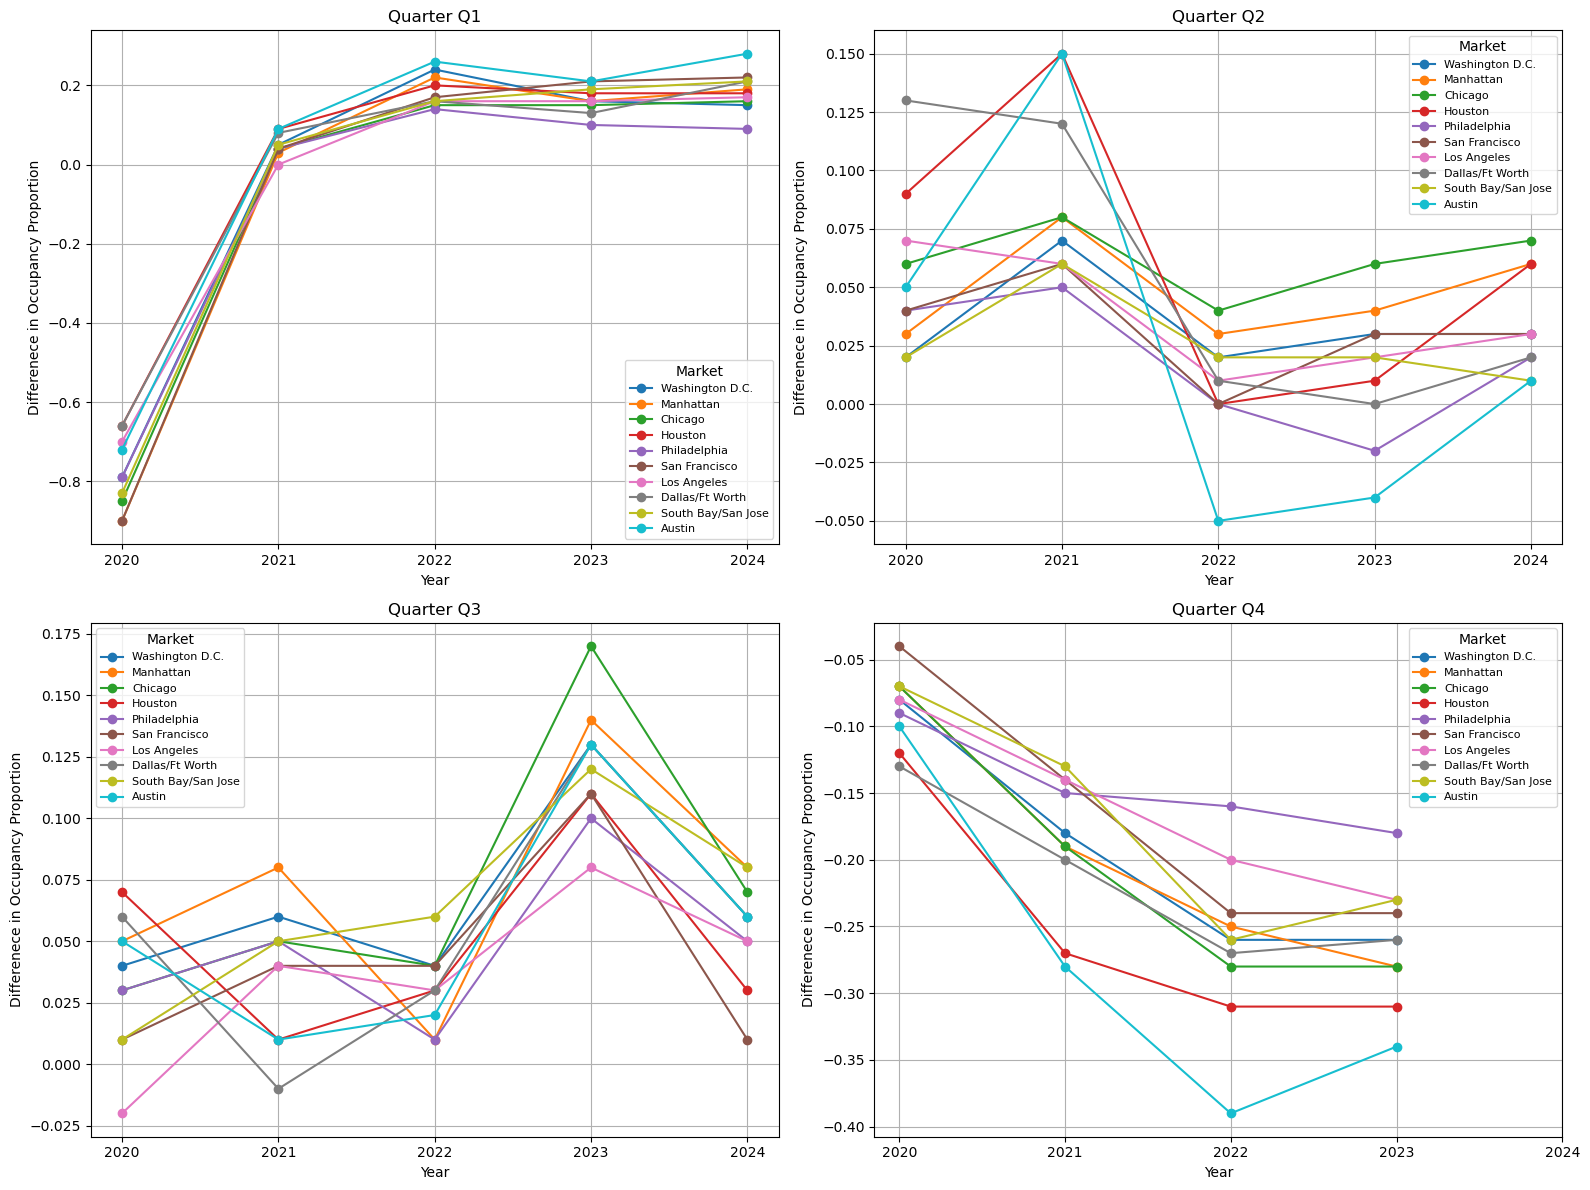

In [18]:
# List of all unique markets
markets = df['market'].unique()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
quarters = ['Q1', 'Q2', 'Q3', 'Q4']  # Assuming you want all four quarters

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each quarter and create a plot
for i, quarter in enumerate(quarters):
    ax = axes[i]
    
    # Filter data for the current quarter
    quarter_data = df[df['quarter'] == quarter]
    
    # Loop through each market and plot the data
    for market in markets:
        market_data = quarter_data[quarter_data['market'] == market]
        ax.plot(market_data['year'], market_data['occupancy_quarter_difference'], marker='o', label=market)
    
    ax.set_title(f'Quarter {quarter}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Differenece in Occupancy Proportion')
    ax.set_xticks(df['year'].unique())  # Set x-ticks to be each unique year
    ax.legend(title='Market', fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()